In [43]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [44]:
data = pd.read_csv('Reliance_bse_close_price.csv')
data.head()
#print '\n Data Types:'
#print data.dtypes

,Date,Close Price
0,29-March-2019,1363.05
1,28-March-2019,1360.55
2,27-March-2019,1350.10
3,26-March-2019,1367.15
4,25-March-2019,1325.25


In [75]:
dateparse = lambda dates: pd.datetime.strptime(dates,'%d-%B-%Y')

data = pd.read_csv('Reliance_bse_close_price.csv', parse_dates=['Date'], index_col='Date',date_parser=dateparse)
data.head()


,Close Price
Date,
2019-03-29,1363.05
2019-03-28,1360.55
2019-03-27,1350.10
2019-03-26,1367.15
2019-03-25,1325.25


In [76]:
data.index

DatetimeIndex(['2019-03-29', '2019-03-28', '2019-03-27', '2019-03-26',
               '2019-03-25', '2019-03-22', '2019-03-20', '2019-03-19',
               '2019-03-18', '2019-03-15',
               ...
               '2009-01-15', '2009-01-14', '2009-01-13', '2009-01-12',
               '2009-01-09', '2009-01-07', '2009-01-06', '2009-01-05',
               '2009-01-02', '2009-01-01'],
              dtype='datetime64[ns]', name='Date', length=2538, freq=None)

In [83]:
#Creating train and test set 
#Index 10392 marks the end of October 2013 
train=data[0:2018-12-31] 
test=data[2018-12-31:]


In [84]:
ts = train
ts.head(10)

,Close Price
Date,
2019-03-29,1363.05
2019-03-28,1360.55
2019-03-27,1350.10
2019-03-26,1367.15
2019-03-25,1325.25
2019-03-22,1342.10
2019-03-20,1375.60
2019-03-19,1375.25
2019-03-18,1347.60


In [86]:
ts['2019-03-29']

,Close Price
Date,
2019-03-29,1363.05


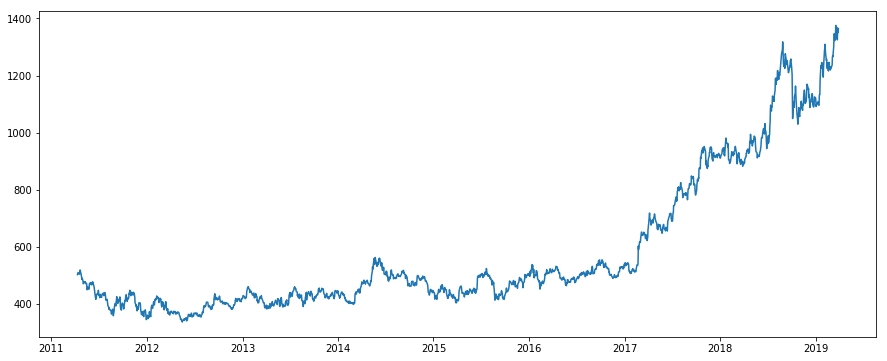

In [88]:
plt.plot(ts)

In [89]:
from statsmodels.tsa.stattools import adfuller
from pandas.core import datetools
import sys
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean =pd.rolling_mean(timeseries, window=12)
    rolstd =pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

/home/nishant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  import sys
/home/nishant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()
  


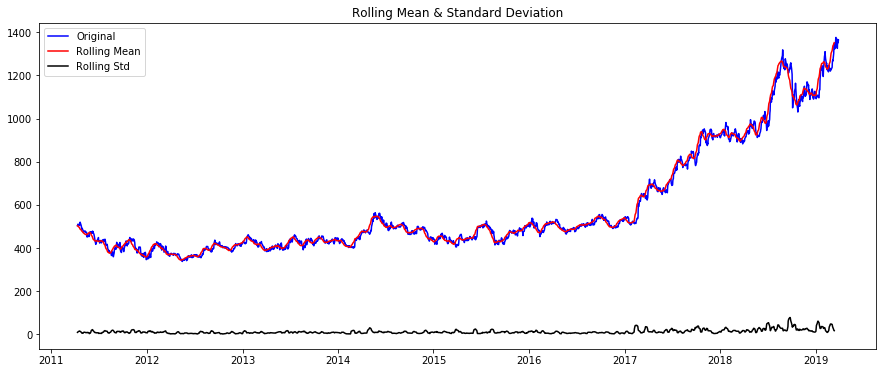

Results of Dickey-Fuller Test:


ValueError: too many values to unpack (expected 2)

In [90]:
test_stationarity(ts)

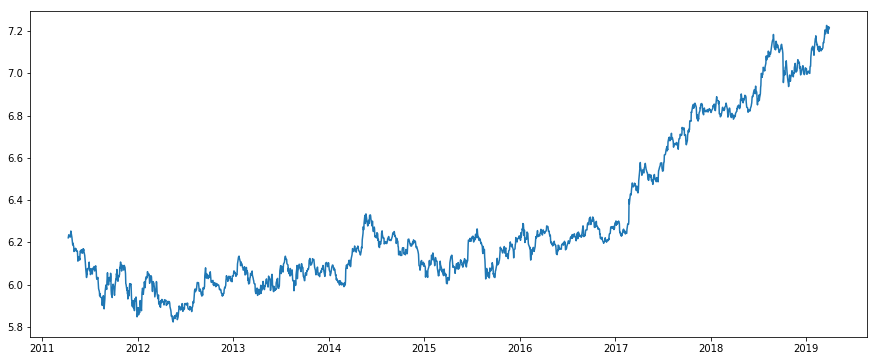

In [91]:
ts_log = np.log(ts)
plt.plot(ts_log)

/home/nishant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  """Entry point for launching an IPython kernel.


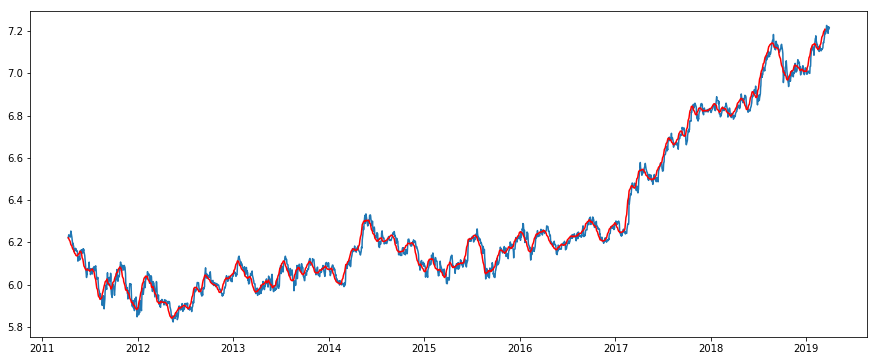

In [92]:
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [93]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

,Close Price
Date,
2019-03-29,NaN
2019-03-28,NaN
2019-03-27,NaN
2019-03-26,NaN
2019-03-25,NaN
2019-03-22,NaN
2019-03-20,NaN
2019-03-19,NaN
2019-03-18,NaN


/home/nishant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  import sys
/home/nishant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()
  


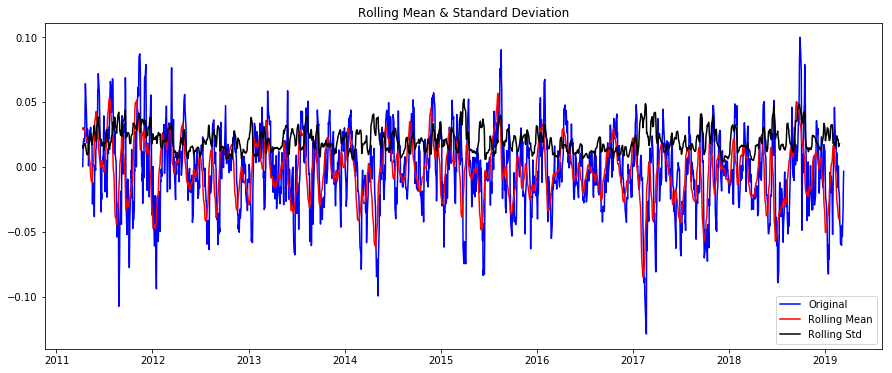

Results of Dickey-Fuller Test:


ValueError: too many values to unpack (expected 2)

In [94]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

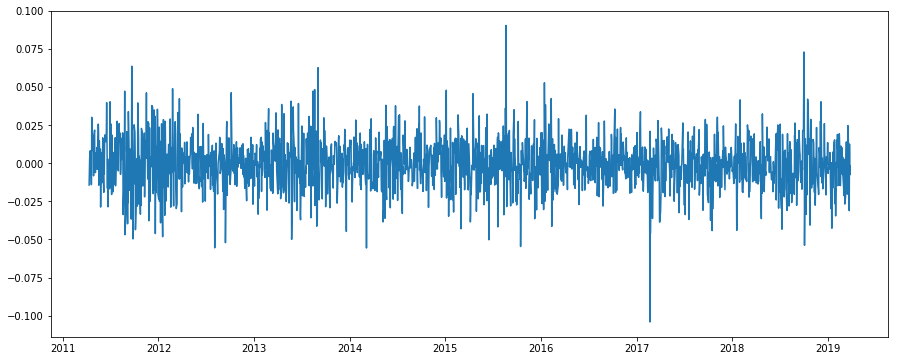

In [95]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

/home/nishant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  import sys
/home/nishant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()
  


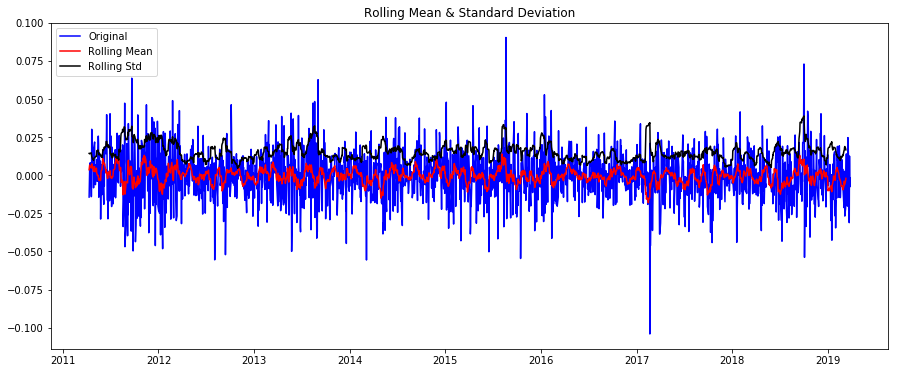

Results of Dickey-Fuller Test:


ValueError: too many values to unpack (expected 2)

In [96]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

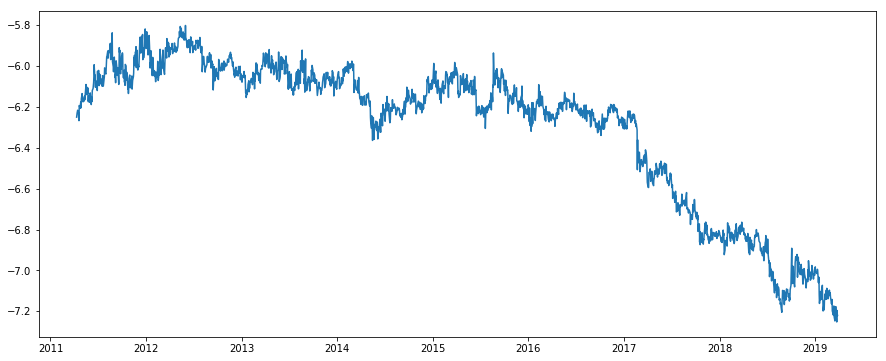

In [97]:
ts_log_diff2 = ts_log_diff - ts_log.shift()
plt.plot(ts_log_diff2)

In [98]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

ValueError: You must specify a freq or x must be a pandas object with a timeseries index witha freq not set to None

In [99]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf



In [100]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

Text(0.5,1,'Autocorrelation Function')

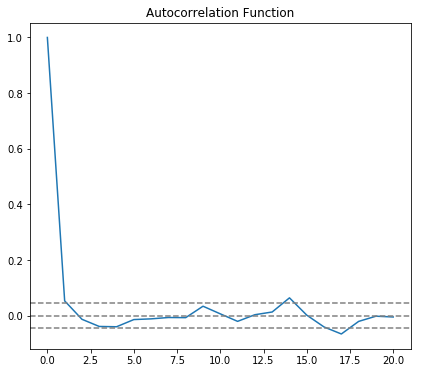

In [101]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

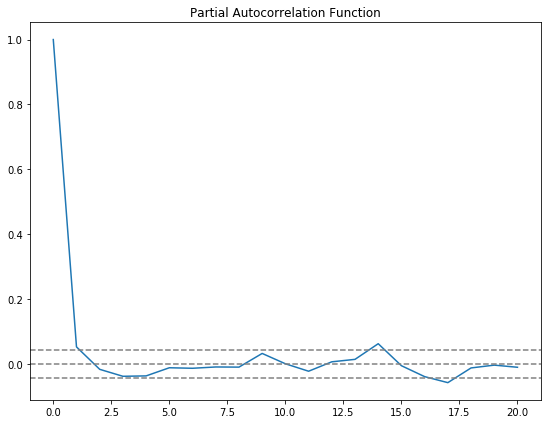

In [102]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [103]:
from statsmodels.tsa.arima_model import ARIMA

/home/nishant/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/home/nishant/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/home/nishant/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/home/nishant/anaconda3/lib/python3.6/site-

ValueError: Cannot add integral value to Timestamp without freq.

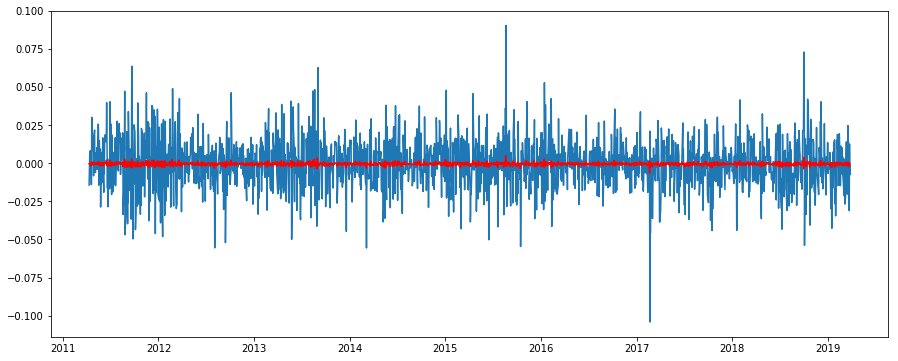

In [104]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

In [ ]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

In [ ]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

In [ ]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

In [ ]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

ValueError: Cannot add integral value to Timestamp without freq.

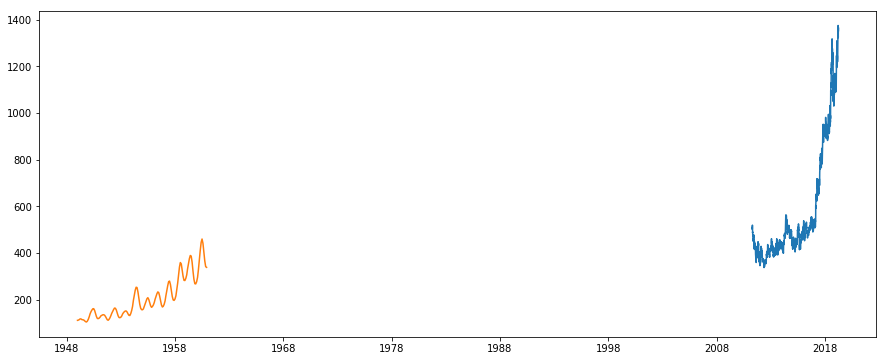

In [105]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))